In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load files, Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, on = 'city', how='outer')

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Group the merged df by city
group_city_df = city_ride_df.groupby(['city'])

In [3]:
# Calculate all the merged values needed for the plots below
avg_fare = group_city_df['fare'].mean()
sum_fares = group_city_df['fare'].sum()
ride_count = group_city_df['ride_id'].count()
driver_count=group_city_df['driver_count'].first()
city_type = group_city_df['type'].first()

In [4]:
# Create a new data frame with the value calculated above
Pyber_stats_df = pd.DataFrame({'Average Fare':avg_fare,
                  'Total Fares':sum_fares,
                  'Ride Count': ride_count,
                  'Driver Count': driver_count,'City Type': city_type})
Pyber_stats_df.head()

,Average Fare,Total Fares,Ride Count,Driver Count,City Type
city,,,,,
Amandaburgh,24.641667,443.55,18,12,Urban
Barajasview,25.332273,557.31,22,26,Urban
Barronchester,36.422500,582.76,16,11,Suburban
Bethanyland,32.956111,593.21,18,22,Suburban
Bradshawfurt,40.064000,400.64,10,7,Rural


## Bubble Plot of Ride Sharing Data

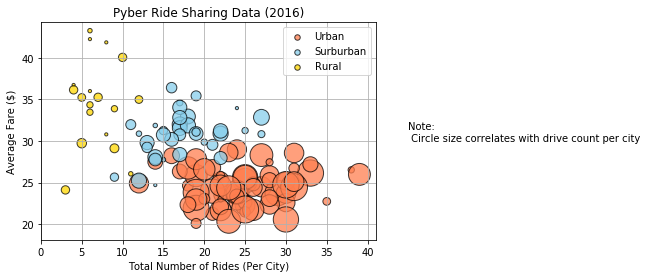

<Figure size 432x288 with 0 Axes>

In [5]:
# Obtain the x and y coordinates for each of the three city types
Pyber_Urban_stats_df = Pyber_stats_df.loc[Pyber_stats_df['City Type'] == 'Urban']
Pyber_Suburban_stats_df = Pyber_stats_df.loc[Pyber_stats_df['City Type'] == 'Suburban']
Pyber_Rural_stats_df = Pyber_stats_df.loc[Pyber_stats_df['City Type'] == 'Rural']

# Build the scatter plots for each city types
plt.figure()
plt.scatter(Pyber_Urban_stats_df['Ride Count'], Pyber_Urban_stats_df['Average Fare'], 
            marker="o", facecolors = 'Coral', edgecolors="black", label = 'Urban',
            s=Pyber_Urban_stats_df['Driver Count']*10, alpha=0.75)
plt.scatter(Pyber_Suburban_stats_df['Ride Count'], Pyber_Suburban_stats_df['Average Fare'], 
            marker="o", facecolors = 'SkyBlue', edgecolors="black", label = 'Surburban',
            s=Pyber_Suburban_stats_df['Driver Count']*10, alpha=0.75)
plt.scatter(Pyber_Rural_stats_df['Ride Count'], Pyber_Rural_stats_df['Average Fare'], 
            marker="o", facecolors = 'Gold', edgecolors="black", label = 'Rural',
            s=Pyber_Rural_stats_df['Driver Count']*10, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlim(0, max(Pyber_Urban_stats_df['Ride Count'])+2)
plt.ylim(min(Pyber_Rural_stats_df['Average Fare'])-6,max(Pyber_Rural_stats_df['Average Fare'])+1)
plt.grid()

# Create a legend
lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)

#change the marker size manually for all lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(45,30,'Note:\n Circle size correlates with drive count per city')

# Save Figure
plt.show()
plt.savefig('./Images/Pyber_Bubble_Plot')

## Total Fares by City Type

In [6]:
# Calculate Type Percents
Group_city_type_fares = Pyber_stats_df.groupby('City Type')['Total Fares'].sum()
Group_city_type_fares


City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

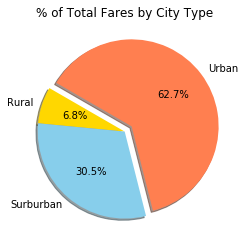

In [7]:
colors = ['Gold', 'SkyBlue', 'Coral']
city_type = ['Rural', 'Surburban', 'Urban']
explode = (0, 0, 0.1)


# Build Pie Chart
plt.pie(Group_city_type_fares, labels = city_type, explode = explode, 
        colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('./Images/Pyber_City_Type_Fares_Plot')
plt.show()

## Total Rides by City Type

In [8]:
Group_city_type_rides = Pyber_stats_df.groupby('City Type')['Ride Count'].sum()
Group_city_type_rides

City Type
Rural        125
Suburban     625
Urban       1625
Name: Ride Count, dtype: int64

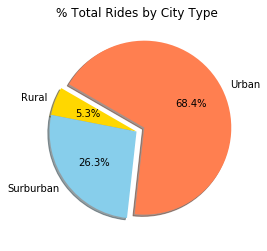

In [9]:
# Build Pie Chart
plt.pie(Group_city_type_rides, labels = city_type, explode = explode, 
        colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% Total Rides by City Type')

# Save Figure
plt.savefig('./Images/Pyber_City_Type_Rides_Plot')
plt.show()

## Total Drivers by City Type

In [10]:
Group_city_type_driver = Pyber_stats_df.groupby('City Type')['Driver Count'].sum()
Group_city_type_driver

City Type
Rural         78
Suburban     490
Urban       2405
Name: Driver Count, dtype: int64

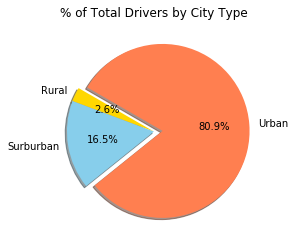

In [11]:
# Build Pie Chart
plt.pie(Group_city_type_driver, labels = city_type, explode = explode, 
        colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('./Images/Pyber_City_Type_Drivers_Plot')
plt.show()